# Data Science

In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic_train = pd.read_csv("train.csv")

In [3]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
titanic_train["Ticket"][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [6]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [7]:
del titanic_train["Ticket"]

In [8]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [9]:
titanic_train["Pclass"] = new_Pclass

In [10]:
titanic_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
char_cabin = titanic_train["Cabin"].astype(str)
new_Cabin = np.array([cabin[0] for cabin in char_cabin])
new_Cabin = pd.Categorical(new_Cabin)
new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [12]:
titanic_train["Cabin"] = new_Cabin

In [13]:
dummy_vector = pd.Series([1,None,3,None,7,8])
dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [14]:
titanic_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
missing = np.where(titanic_train["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

# Data visualization

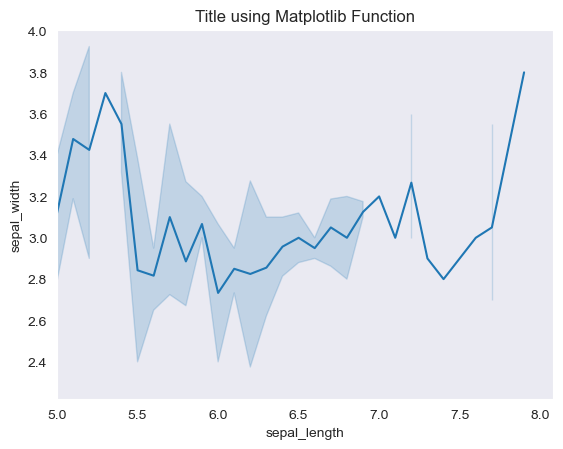

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset x
data = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)
plt.title('Title using Matplotlib Function')
plt.xlim(5)
sns.set_style("dark")

plt.show()


In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


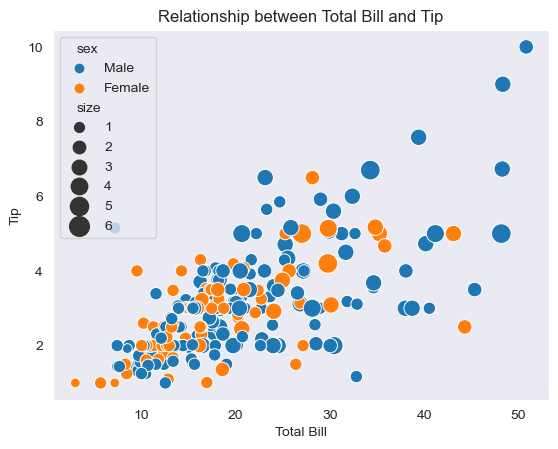

In [6]:
tips = sns.load_dataset("tips")

# customize the scatter plot

sns.scatterplot(x="total_bill", y="tip", hue="sex", size="size", sizes=(50, 200), data=tips)

# add labels and title

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Relationship between Total Bill and Tip")
plt.show()

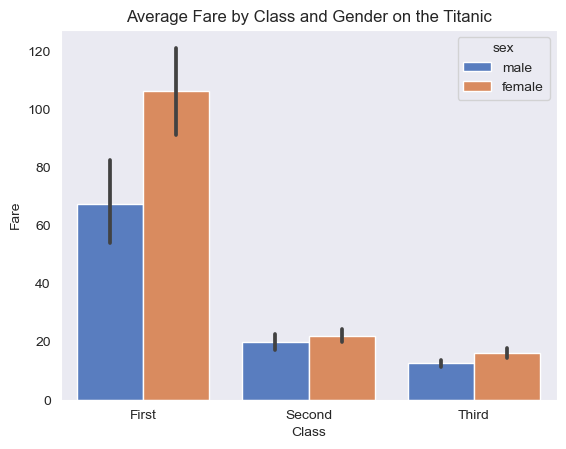

In [7]:
titanic = sns.load_dataset("titanic")

# customize the bar plot

sns.barplot(x="class", y="fare", hue="sex", palette="muted", data=titanic)

# add labels and title

plt.xlabel("Class")
plt.ylabel("Fare")
plt.title("Average Fare by Class and Gender on the Titanic")
plt.show()

C:\Users\Bedirhan\AppData\Local\Temp\ipykernel_10196\3306388906.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot('month', 'year', 'passengers')


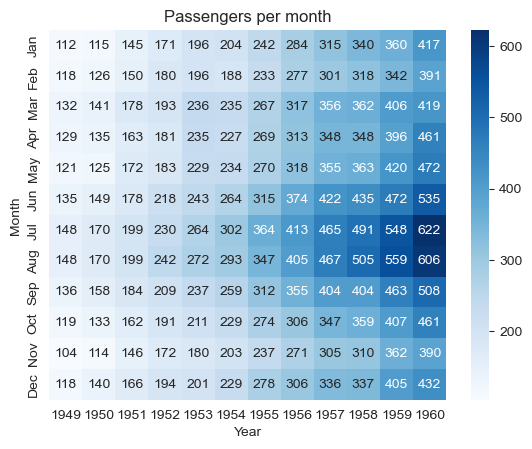

In [8]:
flights = sns.load_dataset('flights')

# Pivot the data
flights = flights.pivot('month', 'year', 'passengers')

# Create a heatmap
sns.heatmap(flights, cmap='Blues', annot=True, fmt='d')

# Set the title and axis labels
plt.title('Passengers per month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

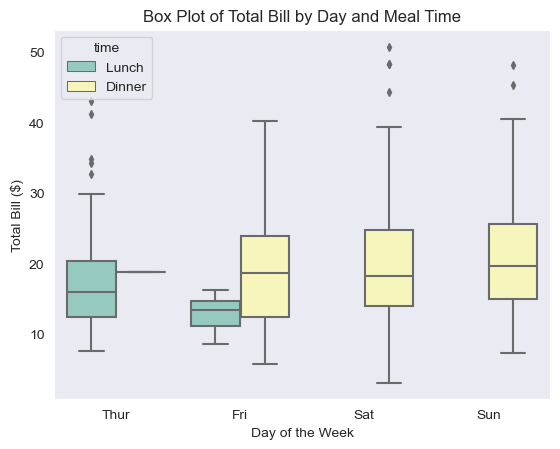

In [9]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips, palette="Set3", linewidth=1.5, fliersize=4)


# add a title, xlabel, and ylabel to the plot using Matplotlib functions

plt.title("Box Plot of Total Bill by Day and Meal Time")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")
plt.show()

# Plotly

In [12]:
import plotly.express as px


# Creating the Figure instance
fig = px.line(x=[1, 2, 3], y=[1, 2, 3])

# showing the plot
fig.show()

In [13]:
df = px.data.iris()

# plotting the line chart
fig = px.line(df, x="species", y="petal_width")

# showing the plot
fig.show()

In [14]:
# plotting the bar chart
fig = px.bar(df, x="sepal_width", y="sepal_length")

# showing the plot
fig.show()

In [15]:
fig = px.histogram(df, x="sepal_length", y="petal_width")

# showing the plot
fig.show()

In [16]:
fig = px.scatter(df, x="species", y="petal_width")

# showing the plot
fig.show()


In [17]:
df = px.data.tips()

# plotting the pie chart
fig = px.pie(df, values="total_bill", names="day")

# showing the plot
fig.show()